In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import zipfile
%matplotlib inline

Canonicalization

In [2]:
with open('data/county_and_state.csv') as f:
    county_and_state = pd.read_csv(f)
    
with open('data/county_and_population.csv') as f:
    county_and_pop = pd.read_csv(f)    

In [3]:
county_and_state

,County,State
0,De Witt County,IL
1,Lac qui Parle County,MN
2,Lewis and Clark County,MT
3,St John the Baptist Parish,LS


In [4]:
county_and_pop

,County,Population
0,DeWitt,16798
1,Lac Qui Parle,8067
2,Lewis & Clark,55716
3,St. John the Baptist,43044


In [5]:
def canonicalize_county(county_name):
    return (
        county_name
        .lower()               # lower case
        .replace(' ', '')      # remove spaces
        .replace('&', 'and')   # replace &
        .replace('.', '')      # remove dot
        .replace('county', '') # remove county
        .replace('parish', '') # remove parish
    )

In [6]:
county_and_pop['clean_county'] = county_and_pop['County'].map(canonicalize_county)
county_and_state['clean_county'] = county_and_state['County'].map(canonicalize_county)

In [9]:
county_and_pop.merge(county_and_state,left_on = 'clean_county', right_on = 'clean_county')

,County_x,Population,clean_county,County_y,State
0,DeWitt,16798,dewitt,De Witt County,IL
1,Lac Qui Parle,8067,lacquiparle,Lac qui Parle County,MN
2,Lewis & Clark,55716,lewisandclark,Lewis and Clark County,MT
3,St. John the Baptist,43044,stjohnthebaptist,St John the Baptist Parish,LS


Processing Data from a Text Log Using Basic Python

In [10]:
with open('data/log.txt', 'r') as f:
    log_lines = f.readlines()

In [11]:
log_lines

['169.237.46.168 - - [26/Jan/2014:10:47:58 -0800] "GET /stat141/Winter04/ HTTP/1.1" 200 2585 "http://anson.ucdavis.edu/courses/"\n',
 '193.205.203.3 - - [2/Feb/2005:17:23:6 -0800] "GET /stat141/Notes/dim.html HTTP/1.0" 404 302 "http://eeyore.ucdavis.edu/stat141/Notes/session.html"\n',
 '169.237.46.240 - "" [3/Feb/2006:10:18:37 -0800] "GET /stat141/homework/Solutions/hw1Sol.pdf HTTP/1.1"']

In [12]:
log_lines[0][20:31]

'26/Jan/2014'

In [13]:
first = log_lines[0]
first

'169.237.46.168 - - [26/Jan/2014:10:47:58 -0800] "GET /stat141/Winter04/ HTTP/1.1" 200 2585 "http://anson.ucdavis.edu/courses/"\n'

In [17]:
pertinent = first.split("[")[1].split(']')[0]
pertinent

'26/Jan/2014:10:47:58 -0800'

In [18]:
pertinent = first.split("[")[1].split(']')[0]
day, month, rest = pertinent.split('/')
year, hour, minute, rest = rest.split(':')
seconds, time_zone = rest.split(' ')
day, month, year, hour, minute, seconds, time_zone

('26', 'Jan', '2014', '10', '47', '58', '-0800')

In [19]:
import re
pattern = r'\[(\d+)/(\w+)/(\d+):(\d+):(\d+):(\d+) (.+)\]'
day, month, year, hour, minute, second, time_zone = re.search(pattern, first).groups()
year, month, day, hour, minute, second, time_zone

('2014', 'Jan', '26', '10', '47', '58', '-0800')

In [20]:
import re
pattern = r'\[(\d+)/(\w+)/(\d+):(\d+):(\d+):(\d+) (.+)\]'
day, month, year, hour, minute, second, time_zone = re.findall(pattern, first)[0]
year, month, day, hour, minute, second, time_zone

('2014', 'Jan', '26', '10', '47', '58', '-0800')

In [22]:
def log_entry_to_series(line):
    return pd.Series(re.search(pattern, line).groups(), index = cols)


In [23]:
cols = ["Day", "Month", "Year", "Hour", "Minute", "Second", "Time Zone"]
log_entry_to_series(first)

Day             26
Month          Jan
Year          2014
Hour            10
Minute          47
Second          58
Time Zone    -0800
dtype: object

In [24]:
log_info = pd.DataFrame(columns=cols)

for line in log_lines:
    log_info = log_info.append(log_entry_to_series(line), ignore_index=True)

log_info

C:\Users\MM\AppData\Local\Temp\ipykernel_22988\3989733472.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log_info = log_info.append(log_entry_to_series(line), ignore_index=True)
C:\Users\MM\AppData\Local\Temp\ipykernel_22988\3989733472.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log_info = log_info.append(log_entry_to_series(line), ignore_index=True)
C:\Users\MM\AppData\Local\Temp\ipykernel_22988\3989733472.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log_info = log_info.append(log_entry_to_series(line), ignore_index=True)


,Day,Month,Year,Hour,Minute,Second,Time Zone
0,26,Jan,2014,10,47,58,-0800
1,2,Feb,2005,17,23,6,-0800
2,3,Feb,2006,10,18,37,-0800


In [25]:
log_lines[0]

'169.237.46.168 - - [26/Jan/2014:10:47:58 -0800] "GET /stat141/Winter04/ HTTP/1.1" 200 2585 "http://anson.ucdavis.edu/courses/"\n'

Real World Example #1: Restaurant Data

In [26]:
vio = pd.read_csv('data/violations.csv', header=0, names=['id', 'date', 'desc'])
desc = vio['desc']
vio.head()

,id,date,desc
0,19,20171211,Inadequate food safety knowledge or lack of ce...
1,19,20171211,Unapproved or unmaintained equipment or utensils
2,19,20160513,Unapproved or unmaintained equipment or utensi...
3,19,20160513,Unclean or degraded floors walls or ceilings ...
4,19,20160513,Food safety certificate or food handler card n...


In [27]:
counts = desc.value_counts()

counts[:10]

Unclean or degraded floors walls or ceilings                          999
Unapproved or unmaintained equipment or utensils                      659
Inadequately cleaned or sanitized food contact surfaces               493
Improper food storage                                                 476
Inadequate and inaccessible handwashing facilities                    467
Moderate risk food holding temperature                                452
Wiping cloths not clean or properly stored or inadequate sanitizer    418
Moderate risk vermin infestation                                      374
Unclean nonfood contact surfaces                                      369
Food safety certificate or food handler card not available            353
Name: desc, dtype: int64

In [28]:
counts[50:60]

Unclean or degraded floors walls or ceilings  [ date violation corrected: 11/29/2017 ]              16
Unclean or degraded floors walls or ceilings  [ date violation corrected: 9/19/2017 ]               16
Inadequate HACCP plan record keeping                                                                16
Unclean or degraded floors walls or ceilings  [ date violation corrected: 11/27/2017 ]              15
Unclean or degraded floors walls or ceilings  [ date violation corrected: 12/7/2017 ]               15
Inadequately cleaned or sanitized food contact surfaces  [ date violation corrected: 9/26/2017 ]    14
Unclean or degraded floors walls or ceilings  [ date violation corrected: 11/28/2017 ]              14
Unclean or degraded floors walls or ceilings  [ date violation corrected: 9/6/2017 ]                14
Unapproved or unmaintained equipment or utensils  [ date violation corrected: 9/19/2017 ]           14
Unapproved  living quarters in food facility                             

In [30]:
#Use regular expressions to cut out the extra info in square braces.
vio['clean_desc'] = (vio['desc']
                       .str.replace('\s\[x*]$','')
                       .str.strip()
                       .str.lower())

vio.head()

C:\Users\MM\AppData\Local\Temp\ipykernel_22988\2554356531.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace('\s\[x*]$','')


,id,date,desc,clean_desc
0,19,20171211,Inadequate food safety knowledge or lack of ce...,inadequate food safety knowledge or lack of ce...
1,19,20171211,Unapproved or unmaintained equipment or utensils,unapproved or unmaintained equipment or utensils
2,19,20160513,Unapproved or unmaintained equipment or utensi...,unapproved or unmaintained equipment or utensi...
3,19,20160513,Unclean or degraded floors walls or ceilings ...,unclean or degraded floors walls or ceilings ...
4,19,20160513,Food safety certificate or food handler card n...,food safety certificate or food handler card n...


In [31]:
vio['clean_desc'].value_counts().head()

unclean or degraded floors walls or ceilings               999
unapproved or unmaintained equipment or utensils           659
inadequately cleaned or sanitized food contact surfaces    493
improper food storage                                      476
inadequate and inaccessible handwashing facilities         467
Name: clean_desc, dtype: int64

In [33]:
#use regular expressions to assign new features for the presence of various keywords
# assign: add a new col
with_features = (vio
 .assign(is_clean     = vio['clean_desc'].str.contains('clean|sanit'))
 .assign(is_high_risk = vio['clean_desc'].str.contains('high risk'))
 .assign(is_vermin    = vio['clean_desc'].str.contains('vermin'))
 .assign(is_surface   = vio['clean_desc'].str.contains('wall|ceiling|floor|surface'))
 .assign(is_human     = vio['clean_desc'].str.contains('hand|glove|hair|nail'))
 .assign(is_permit    = vio['clean_desc'].str.contains('permit|certif'))
)
with_features.head()

,id,date,desc,clean_desc,is_clean,is_high_risk,is_vermin,is_surface,is_human,is_permit
0,19,20171211,Inadequate food safety knowledge or lack of ce...,inadequate food safety knowledge or lack of ce...,False,False,False,False,False,True
1,19,20171211,Unapproved or unmaintained equipment or utensils,unapproved or unmaintained equipment or utensils,False,False,False,False,False,False
2,19,20160513,Unapproved or unmaintained equipment or utensi...,unapproved or unmaintained equipment or utensi...,False,False,False,False,False,False
3,19,20160513,Unclean or degraded floors walls or ceilings ...,unclean or degraded floors walls or ceilings ...,True,False,False,True,False,False
4,19,20160513,Food safety certificate or food handler card n...,food safety certificate or food handler card n...,False,False,False,False,True,True


In [35]:
count_features = (with_features
 .groupby(['id', 'date'])
 .sum()
 .reset_index()
)
count_features.iloc[255:260, :]

C:\Users\MM\AppData\Local\Temp\ipykernel_22988\2114888500.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .sum()


,id,date,is_clean,is_high_risk,is_vermin,is_surface,is_human,is_permit
255,489,20150728,5,0,2,3,0,0
256,489,20150807,1,0,0,1,0,0
257,489,20160308,2,2,1,0,1,0
258,489,20160721,2,1,1,1,0,1
259,489,20161220,3,0,1,2,0,0


In [36]:
count_features.query('is_vermin > 1')

,id,date,is_clean,is_high_risk,is_vermin,is_surface,is_human,is_permit
255,489,20150728,5,0,2,3,0,0
291,527,20170821,1,1,2,1,1,1
1508,2622,20160526,4,2,2,3,0,0
1573,2721,20150422,2,1,2,1,0,0
1746,2945,20150921,2,1,2,2,2,1
2277,3776,20151223,2,0,2,1,0,0
3784,6729,20160706,6,0,2,4,2,0
3949,7537,20150304,1,0,2,1,1,0
4017,7661,20160616,2,0,2,2,1,0
4165,9679,20150422,2,0,2,2,0,0


In [37]:
#use a new pandas feature called "melt" that we won't describe in any detail
#the granularity of the resulting frame is a violation type in a given inspection
broken_down_by_violation_type = pd.melt(count_features, id_vars=['id', 'date'],
            var_name='feature', value_name='num_vios')
broken_down_by_violation_type.sort_values(["id", "date"]).head(13)

,id,date,feature,num_vios
0,19,20160513,is_clean,1
12262,19,20160513,is_high_risk,0
24524,19,20160513,is_vermin,0
36786,19,20160513,is_surface,1
49048,19,20160513,is_human,1
61310,19,20160513,is_permit,1
1,19,20171211,is_clean,0
12263,19,20171211,is_high_risk,0
24525,19,20171211,is_vermin,0
36787,19,20171211,is_surface,0


In [40]:
#read in the scores
ins = pd.read_csv('data/inspections.csv',
                  header=0,
                  usecols=[0, 1, 2],
                  names=['id', 'score', 'date'])
ins.head()

,id,score,date
0,19,94,20160513
1,19,94,20171211
2,24,98,20171101
3,24,98,20161005
4,24,96,20160311


In [41]:
#join scores with the table broken down by violation type
violation_type_and_scores = (
    broken_down_by_violation_type
    .merge(ins, left_on=['id', 'date'], right_on=['id', 'date'])
)
violation_type_and_scores.head(12)

,id,date,feature,num_vios,score
0,19,20160513,is_clean,1,94
1,19,20160513,is_high_risk,0,94
2,19,20160513,is_vermin,0,94
3,19,20160513,is_surface,1,94
4,19,20160513,is_human,1,94
5,19,20160513,is_permit,1,94
6,19,20171211,is_clean,0,94
7,19,20171211,is_high_risk,0,94
8,19,20171211,is_vermin,0,94
9,19,20171211,is_surface,0,94


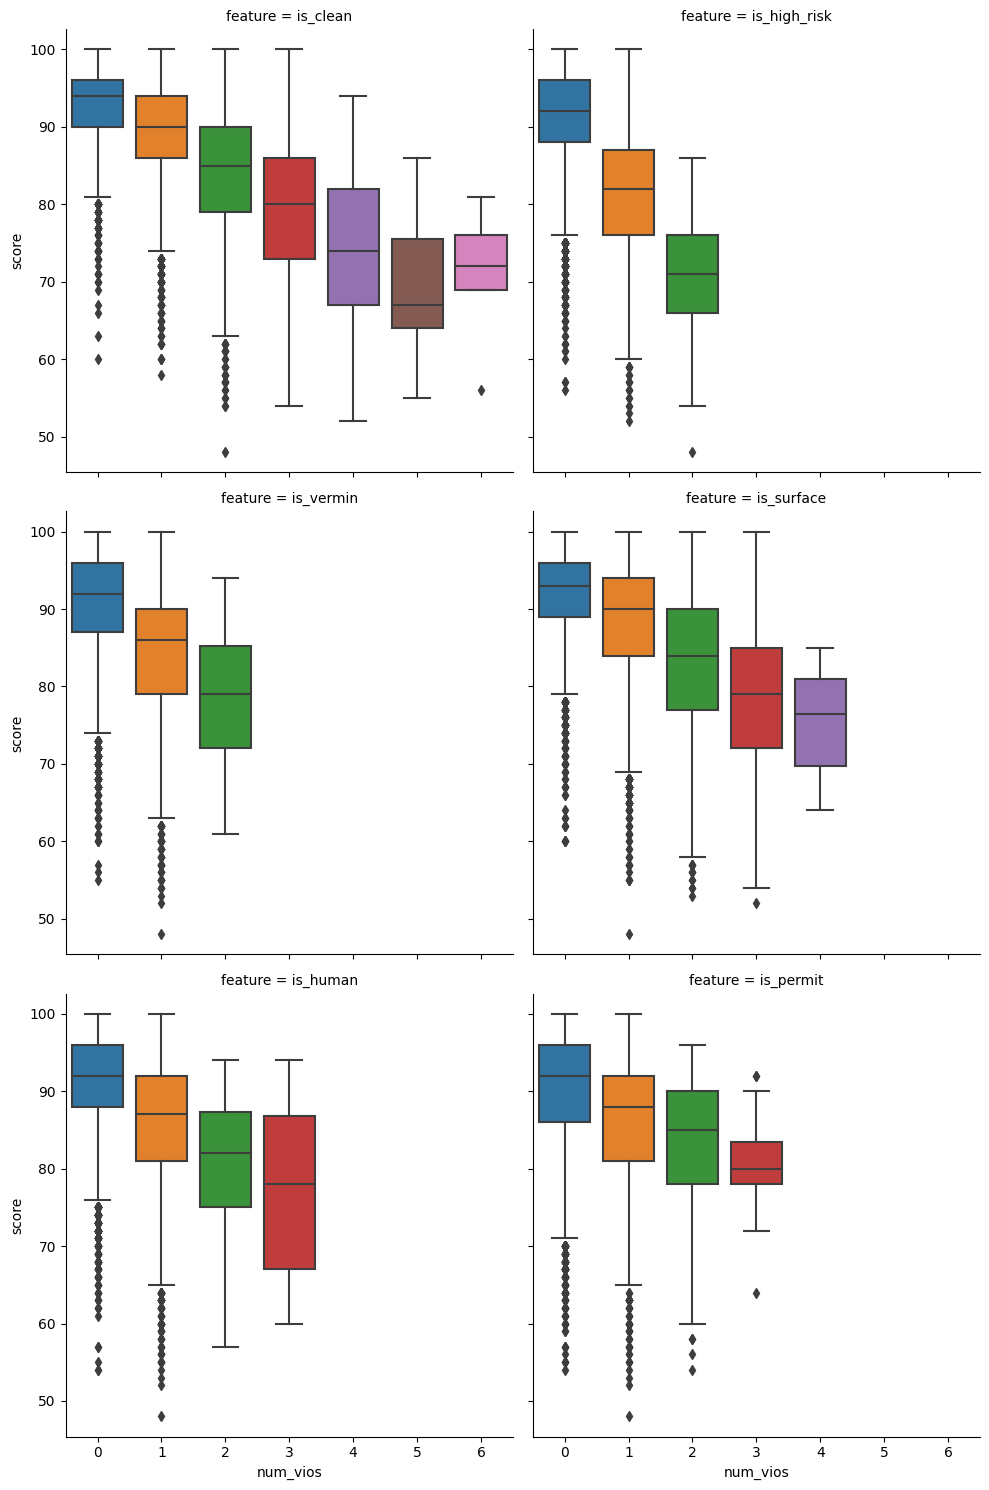

In [42]:
sns.catplot(x='num_vios', y='score',
               col='feature', col_wrap=2,
               kind='box',
               data=violation_type_and_scores)

Text Processing Example 2: Police Data

In [43]:
import ds100_utils

calls_url = 'https://data.cityofberkeley.info/api/views/k2nh-s5h5/rows.csv?accessType=DOWNLOAD'
calls_file = ds100_utils.fetch_and_cache(calls_url, 'calls.csv')
calls = pd.read_csv(calls_file, warn_bad_lines=True)
calls.head()

Downloading... Done!


C:\Users\MM\AppData\Local\Temp\ipykernel_22988\1319644515.py:5: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  calls = pd.read_csv(calls_file, warn_bad_lines=True)


,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
0,22036516,THEFT FROM AUTO,08/10/2022 12:00:00 AM,6:10:00 AM,LARCENY - FROM VEHICLE,3,10/13/2022 04:42:00 PM,"Berkeley, CA\n(37.86988, -122.27054)",NaN,Berkeley,CA
1,22027674,BURGLARY RESIDENTIAL,06/16/2022 12:00:00 AM,8:25:00 PM,BURGLARY - RESIDENTIAL,4,10/13/2022 04:42:00 PM,"1700 BLOCK OXFORD ST\nBerkeley, CA\n(37.87674,...",1700 BLOCK OXFORD ST,Berkeley,CA
2,22023993,VANDALISM,05/25/2022 12:00:00 AM,8:00:00 AM,VANDALISM,3,10/13/2022 04:42:00 PM,"2400 BLOCK 8TH ST\nBerkeley, CA\n(37.86206, -1...",2400 BLOCK 8TH ST,Berkeley,CA
3,22026547,DISTURBANCE,06/10/2022 12:00:00 AM,9:35:00 PM,DISORDERLY CONDUCT,5,10/13/2022 04:42:00 PM,"1300 BLOCK HEARST AVE\nBerkeley, CA\n(37.87133...",1300 BLOCK HEARST AVE,Berkeley,CA
4,22018126,ASSAULT/BATTERY FEL.,04/20/2022 12:00:00 AM,3:31:00 PM,ASSAULT,3,10/13/2022 04:42:00 PM,"3000 BLOCK SHATTUCK AVE\nBerkeley, CA\n(37.855...",3000 BLOCK SHATTUCK AVE,Berkeley,CA


In [44]:
len(calls)

4490

In [45]:
print(calls['Block_Location'].iloc[4])

3000 BLOCK SHATTUCK AVE
Berkeley, CA
(37.85507, -122.26677)


In [46]:
calls['Block_Location'][4]

'3000 BLOCK SHATTUCK AVE\nBerkeley, CA\n(37.85507, -122.26677)'

In [47]:
calls_lat_lon = (
    calls['Block_Location']
    .str.extract("\((\d+\.\d+)\, (-\d+\.\d+)\)")
)
calls_lat_lon.columns = ['Lat', 'Lon']
calls_lat_lon.head(10)

,Lat,Lon
0,37.86988,-122.27054
1,37.87674,-122.26665
2,37.86206,-122.29346
3,37.87133,-122.28656
4,37.85507,-122.26677
5,37.86397,-122.26036
6,37.87025,-122.29843
7,37.87637,-122.26229
8,37.86725,-122.26326
9,37.86746,-122.29285


In [48]:
calls_lat_lon.isnull().sum()

Lat    0
Lon    0
dtype: int64

In [49]:
calls[calls_lat_lon.isnull().any(axis=1)]['Block_Location'].head(10)

Series([], Name: Block_Location, dtype: object)

In [50]:
calls['Lat'] = calls_lat_lon['Lat']
calls['Lon'] = calls_lat_lon['Lon']
calls.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,Lat,Lon
0,22036516,THEFT FROM AUTO,08/10/2022 12:00:00 AM,6:10:00 AM,LARCENY - FROM VEHICLE,3,10/13/2022 04:42:00 PM,"Berkeley, CA\n(37.86988, -122.27054)",NaN,Berkeley,CA,37.86988,-122.27054
1,22027674,BURGLARY RESIDENTIAL,06/16/2022 12:00:00 AM,8:25:00 PM,BURGLARY - RESIDENTIAL,4,10/13/2022 04:42:00 PM,"1700 BLOCK OXFORD ST\nBerkeley, CA\n(37.87674,...",1700 BLOCK OXFORD ST,Berkeley,CA,37.87674,-122.26665
2,22023993,VANDALISM,05/25/2022 12:00:00 AM,8:00:00 AM,VANDALISM,3,10/13/2022 04:42:00 PM,"2400 BLOCK 8TH ST\nBerkeley, CA\n(37.86206, -1...",2400 BLOCK 8TH ST,Berkeley,CA,37.86206,-122.29346
3,22026547,DISTURBANCE,06/10/2022 12:00:00 AM,9:35:00 PM,DISORDERLY CONDUCT,5,10/13/2022 04:42:00 PM,"1300 BLOCK HEARST AVE\nBerkeley, CA\n(37.87133...",1300 BLOCK HEARST AVE,Berkeley,CA,37.87133,-122.28656
4,22018126,ASSAULT/BATTERY FEL.,04/20/2022 12:00:00 AM,3:31:00 PM,ASSAULT,3,10/13/2022 04:42:00 PM,"3000 BLOCK SHATTUCK AVE\nBerkeley, CA\n(37.855...",3000 BLOCK SHATTUCK AVE,Berkeley,CA,37.85507,-122.26677


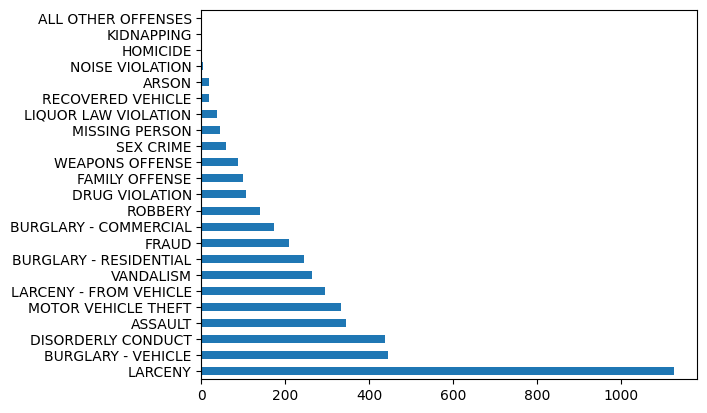

In [52]:
calls['CVLEGEND'].value_counts().plot(kind='barh');

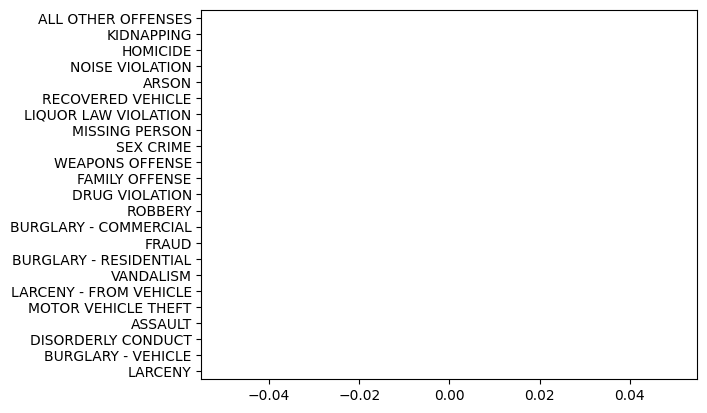

In [53]:
(missing_lat_lon['CVLEGEND'].value_counts() 
 / calls['CVLEGEND'].value_counts()
).sort_values(ascending=False).plot(kind="barh");

In [61]:
import folium
import folium.plugins

SF_COORDINATES = (37.87, -122.28)
sf_map = folium.Map(location=SF_COORDINATES, zoom_start=13)
locs = calls[['Lat', 'Lon']].astype('float').dropna().values
heatmap = folium.plugins.HeatMap(locs.tolist(), radius=10)
sf_map.add_child(heatmap)

In [59]:
import folium.plugins

locations = calls[calls['CVLEGEND'] == 'ASSAULT'][['Lat', 'Lon']]

cluster = folium.plugins.MarkerCluster()
for _, r in locations.dropna().iterrows():
    cluster.add_child(
        folium.Marker([float(r["Lat"]), float(r["Lon"])]))
    
sf_map = folium.Map(location=SF_COORDINATES, zoom_start=13)
sf_map.add_child(cluster)

In [57]:
log_lines

['169.237.46.168 - - [26/Jan/2014:10:47:58 -0800] "GET /stat141/Winter04/ HTTP/1.1" 200 2585 "http://anson.ucdavis.edu/courses/"\n',
 '193.205.203.3 - - [2/Feb/2005:17:23:6 -0800] "GET /stat141/Notes/dim.html HTTP/1.0" 404 302 "http://eeyore.ucdavis.edu/stat141/Notes/session.html"\n',
 '169.237.46.240 - "" [3/Feb/2006:10:18:37 -0800] "GET /stat141/homework/Solutions/hw1Sol.pdf HTTP/1.1"']

In [58]:
pd.Series(log_lines).str.extract(r'\[(.*) -0800\]').apply(
    lambda s: pd.to_datetime(s, format='%d/%b/%Y:%H:%M:%S'))

,0
0,2014-01-26 10:47:58
1,2005-02-02 17:23:06
2,2006-02-03 10:18:37
